In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import nltk
import string

In [2]:
train = pd.read_csv("twitter train.csv")
test = pd.read_csv("twitter test.csv")

In [3]:
train_original=train.copy()
test_original=test.copy()

In [4]:
combi = train.append(test, ignore_index=True)
combi.shape

(49159, 3)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
id       31962 non-null int64
label    31962 non-null int64
tweet    31962 non-null object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17197 entries, 0 to 17196
Data columns (total 2 columns):
id       17197 non-null int64
tweet    17197 non-null object
dtypes: int64(1), object(1)
memory usage: 268.8+ KB


In [7]:
combi.groupby('label').describe()

id                                                               \
         count          mean          std   min      25%      50%       75%   
label                                                                         
0.0    29720.0  15974.454441  9223.783469   1.0  7981.75  15971.5  23965.25   
1.0     2242.0  16074.896075  9267.955758  14.0  8075.25  16095.0  24022.00   

                
           max  
label           
0.0    31962.0  
1.0    31961.0

In [8]:
combi.tail()

,id,label,tweet
49154,49155,NaN,thought factory: left-right polarisation! #tru...
49155,49156,NaN,feeling like a mermaid ð #hairflip #neverre...
49156,49157,NaN,#hillary #campaigned today in #ohio((omg)) &am...
49157,49158,NaN,"happy, at work conference: right mindset leads..."
49158,49159,NaN,"my song ""so glad"" free download! #shoegaze ..."


In [9]:
combi['length']=combi['tweet'].apply(len)

In [10]:
combi.head()

,id,label,tweet,length
0,1,0.0,@user when a father is dysfunctional and is s...,102
1,2,0.0,@user @user thanks for #lyft credit i can't us...,122
2,3,0.0,bihday your majesty,21
3,4,0.0,#model i love u take with u all the time in ...,86
4,5,0.0,factsguide: society now #motivation,39


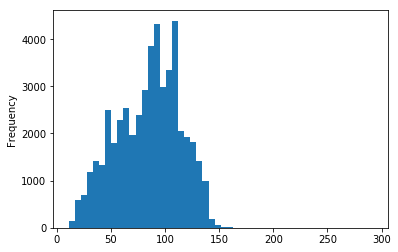

In [11]:
combi['length'].plot(bins=50, kind='hist') 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C187F98>,
      dtype=object)

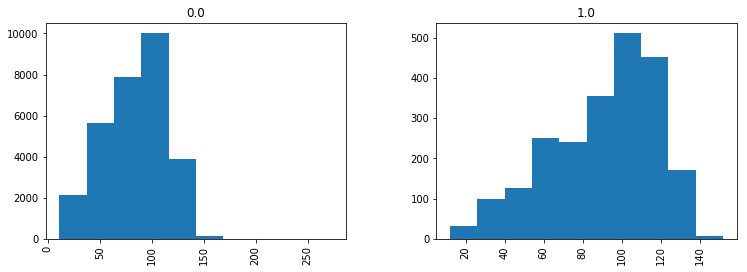

In [12]:
combi.hist(column='length', by='label',figsize=(12,4))

In [13]:
from nltk.corpus import stopwords
stopwords.words('english')[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [14]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [15]:
combi['tweet'].apply(text_process)

0        [user, father, dysfunctional, selfish, drags, ...
1        [user, user, thanks, lyft, credit, cant, use, ...
2                                        [bihday, majesty]
3        [model, love, u, take, u, time, urð±, ðð...
4                        [factsguide, society, motivation]
5        [22, huge, fan, fare, big, talking, leave, cha...
6        [user, camping, tomorrow, user, user, user, us...
7        [next, school, year, year, examsð¯, cant, th...
8        [love, land, allin, cavs, champions, cleveland...
9                           [user, user, welcome, im, gr8]
10       [â, ireland, consumer, price, index, mom, cl...
11       [selfish, orlando, standwithorlando, pulseshoo...
12            [get, see, daddy, today, 80days, gettingfed]
13       [user, cnn, calls, michigan, middle, school, b...
14       [comment, australia, opkillingbay, seashepherd...
15       [ouchjunior, angryðgot7, junior, yugyoem, omg]
16                   [thankful, paner, thankful, positiv

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

In [17]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(combi['tweet'])


print(len(bow_transformer.vocabulary_))

63040


In [18]:
messages_bow = bow_transformer.transform(combi['tweet'])

In [19]:
print('Shape of Sparse Matrix: ', messages_bow.shape)
print('Amount of Non-Zero occurences: ', messages_bow.nnz)

Shape of Sparse Matrix:  (49159, 63040)
Amount of Non-Zero occurences:  406026


In [20]:
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format(round(sparsity)))

sparsity: 0


In [21]:
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format(sparsity))

sparsity: 0.013101909653364515


In [22]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [23]:
messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

(49159, 63040)


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [47]:
train_bow = messages_bow[:31962,:]
test_bow = messages_bow[31962:,:]

xtrain, xtest, ytrain, ytest = train_test_split(train_bow, train['label'],test_size=0.3)

In [48]:
lreg = LogisticRegression()
lreg.fit(xtrain, ytrain) 

prediction = lreg.predict_proba(xtest) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int)

f1_score(ytest, prediction_int) 

0.6885245901639345

In [49]:
test_pred = lreg.predict_proba(test_bow)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
test['label'] = test_pred_int
submission = test[['id','label']]
submission.to_csv('nlp_log.csv', index=False)

In [50]:
from sklearn import svm

In [51]:
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain, ytrain)

prediction = svc.predict_proba(xtest)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
f1_score(ytest, prediction_int)

0.6960556844547564

In [52]:
test_pred = svc.predict_proba(test_bow)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
test['label'] = test_pred_int
submission = test[['id','label']]
submission.to_csv('nlp_svm.csv', index=False)

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
rf = RandomForestClassifier().fit(xtrain, ytrain)

prediction = rf.predict(xtest)
f1_score(ytest, prediction)

0.5566801619433198

In [55]:
test_pred = rf.predict(test_bow)
test['label'] = test_pred
submission = test[['id','label']]
submission.to_csv('nlp_rf.csv', index=False)

In [61]:
from sklearn.ensemble import AdaBoostClassifier

In [71]:
clf = AdaBoostClassifier(base_estimator = svc)

In [ ]:
clf.fit(xtrain,ytrain)

In [69]:
prediction = clf.predict(xtest)
f1_score(ytest,prediction)

0.0

In [70]:
test_pred = clf.predict(test_bow)
test['label'] = test_pred
submission = test[['id','label']]
submission.to_csv('nlp_ada.csv', index=False)